<div style="width: 100%; height: 100px; background-color:#FFCDEA; border: 3px solid #FB9AD1; text-align: center; line-height: 100px; color:  #070A52; font-size: 24px; font-weight: bold; border-radius:6px;">
✉️ Simple SMS Spam Detection | Text Classification 🚩
</div>

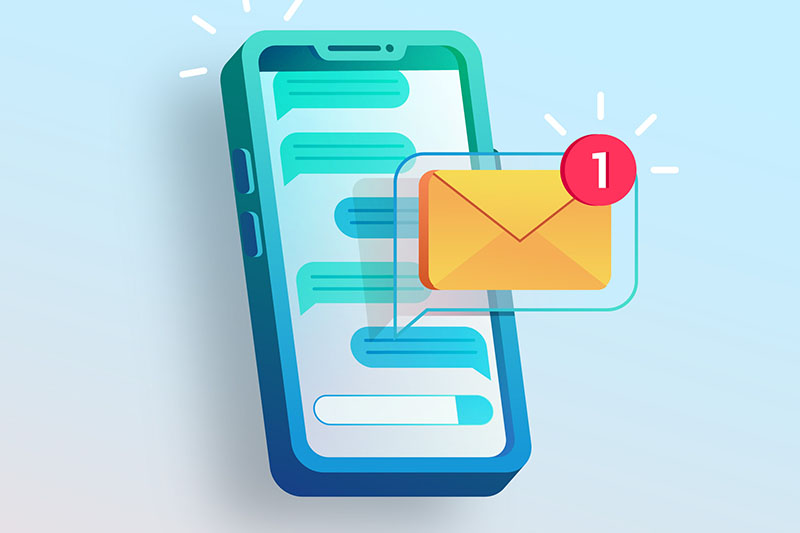

<div style="width: 100%; background-color:#FFCDEA; color: white; padding: 20px; border: 3px solid #FB9AD1; margin-bottom: 20px;border-radius:10px;color: #000000;">
    <h3 style="color: #000000;">Introduction</h3>
    <span>SMS Spam Classification is a project aimed at tackling the issue of unwanted and unsolicited text messages, commonly referred to as "spam." With the widespread use of mobile phones and messaging services, the problem of spam messages has become a significant concern. These messages can be annoying, misleading, and potentially harmful to users. To address this challenge, machine learning techniques are employed to automatically identify and classify text messages as either <strong>"spam" or "ham" (non-spam)</strong>.</span>
    <br>
    <br>
    <span>The main objective of this project is to build and evaluate a text classification model capable of distinguishing between legitimate messages and spam messages. By training on a labeled dataset of SMS messages, the model learns patterns and characteristics of spam content, allowing it to make accurate predictions on new, unseen messages.</span>
    <br>
    <br>
    <span>In this project, we follow a step-by-step approach to accomplish the SMS Spam Classification task:</span>
    <br>
    <br>
    <ul style="list-style-type: none; padding-left: 0;">
        <li><span style="margin-left: -10px;">&#8226;</span><strong> Data Preprocessing:</strong> Prepare the raw SMS text data for analysis by cleaning, tokenizing, and transforming it into a suitable format for machine learning.</li>
        <li><span style="margin-left: -10px;">&#8226;</span><strong> Feature Engineering: </strong>Extract relevant features from the text data to represent the content effectively.</li>
        <li><span style="margin-left: -10px;">&#8226;</span><strong> Model Selection:</strong> Choose a suitable classification algorithm for the task, such as the Logitic Regression classifier.</li>
        <li><span style="margin-left: -10px;">&#8226;</span> <strong> Training and Evaluation:</strong> Train the selected model on a labeled dataset and evaluate its performance using various metrics such as accuracy, precision, recall, and F1-score.</li>
        <li><span style="margin-left: -10px;">&#8226;</span><strong> Visualizing Results:</strong> Visualize the model's predictions and performance metrics to gain insights into its strengths and limitations.</li>
    </ul>
    <br>
    <span>By the end of this project, we aim to have a trained model that can effectively classify incoming SMS messages as spam or legitimate. This classification aids in providing users with a cleaner and safer messaging experience, filtering out unwanted and potentially harmful content.</span>
</div>

<h2 style="position: relative;">
    <span style="color: #070A52;">Dataset Overview</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #FB9AD1;">
</h2>

|Description|Column|
|:------:|:--------:|
|SMS Text|<code>sms</code>|
|<b>Is it spam(1) or ham(0) ?</b>|<code>label [ target variable ]</code>|

<h2 style="position: relative;">
    <span style="color: #070A52;">Import libraries</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #FB9AD1;">
</h2>

In [9]:
!pip install wordcloud


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify.scikitlearn import SklearnClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from wordcloud import WordCloud

In [11]:
#ignore warnings(if have) 
import warnings
warnings.filterwarnings("ignore")

<h2 style="position: relative;">
    <span style="color: #070A52;">Read Dataset</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #FB9AD1;">
</h2>

In [12]:
#rename column 
df = pd.read_csv('spammess.csv')

In [13]:
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [14]:
df.shape

(5572, 5)


<h2 style="position: relative;">
    <span style="color: #070A52;">Data Cleaning</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #FB9AD1;">
</h2>

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [16]:
# Drop unnecessary column 
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [17]:
df.sample(5)

v1                                                 v2
3515  ham  Well, I was about to give up cos they all said...
4322  ham                        Aight well keep me informed
1719  ham  Then u better go sleep.. Dun disturb u liao.. ...
5442  ham  I thought i'd get him a watch, just cos thats ...
5212  ham                      K.k.how is your business now?

In [18]:
# renaming the cols
df.rename(columns={'v1':'label','v2':'text'},inplace=True)
df.sample(5)

label                                               text
1734   ham            I think we're going to finn's now, come
422    ham                           Siva is in hostel aha:-.
4347   ham  You give us back my id proof and  &lt;#&gt;  r...
868   spam  Hello. We need some posh birds and chaps to us...
467    ham              When are you going to ride your bike?

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [20]:
#transform data in column 'label' (ham=0,spam=1)
df['label'] = encoder.fit_transform(df['label'])

In [21]:
df.head(5)

label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

In [22]:
# check missing values
df.isnull().sum()

label    0
text     0
dtype: int64

In [23]:
# check for duplicate values
df.duplicated().sum()

403

In [24]:
# remove duplicates (remain only first text)
df = df.drop_duplicates(keep='first')

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(5169, 2)

<h2 style="position: relative;">
    <span style="color: #070A52;">Data Visualization</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #FB9AD1;">
</h2>

#### <span style="color: #070A52">Label Distribution and Text Length Distribution Plot</span>

In [27]:
label_counts = df['label'].value_counts()
print(label_counts)

label
0    4516
1     653
Name: count, dtype: int64


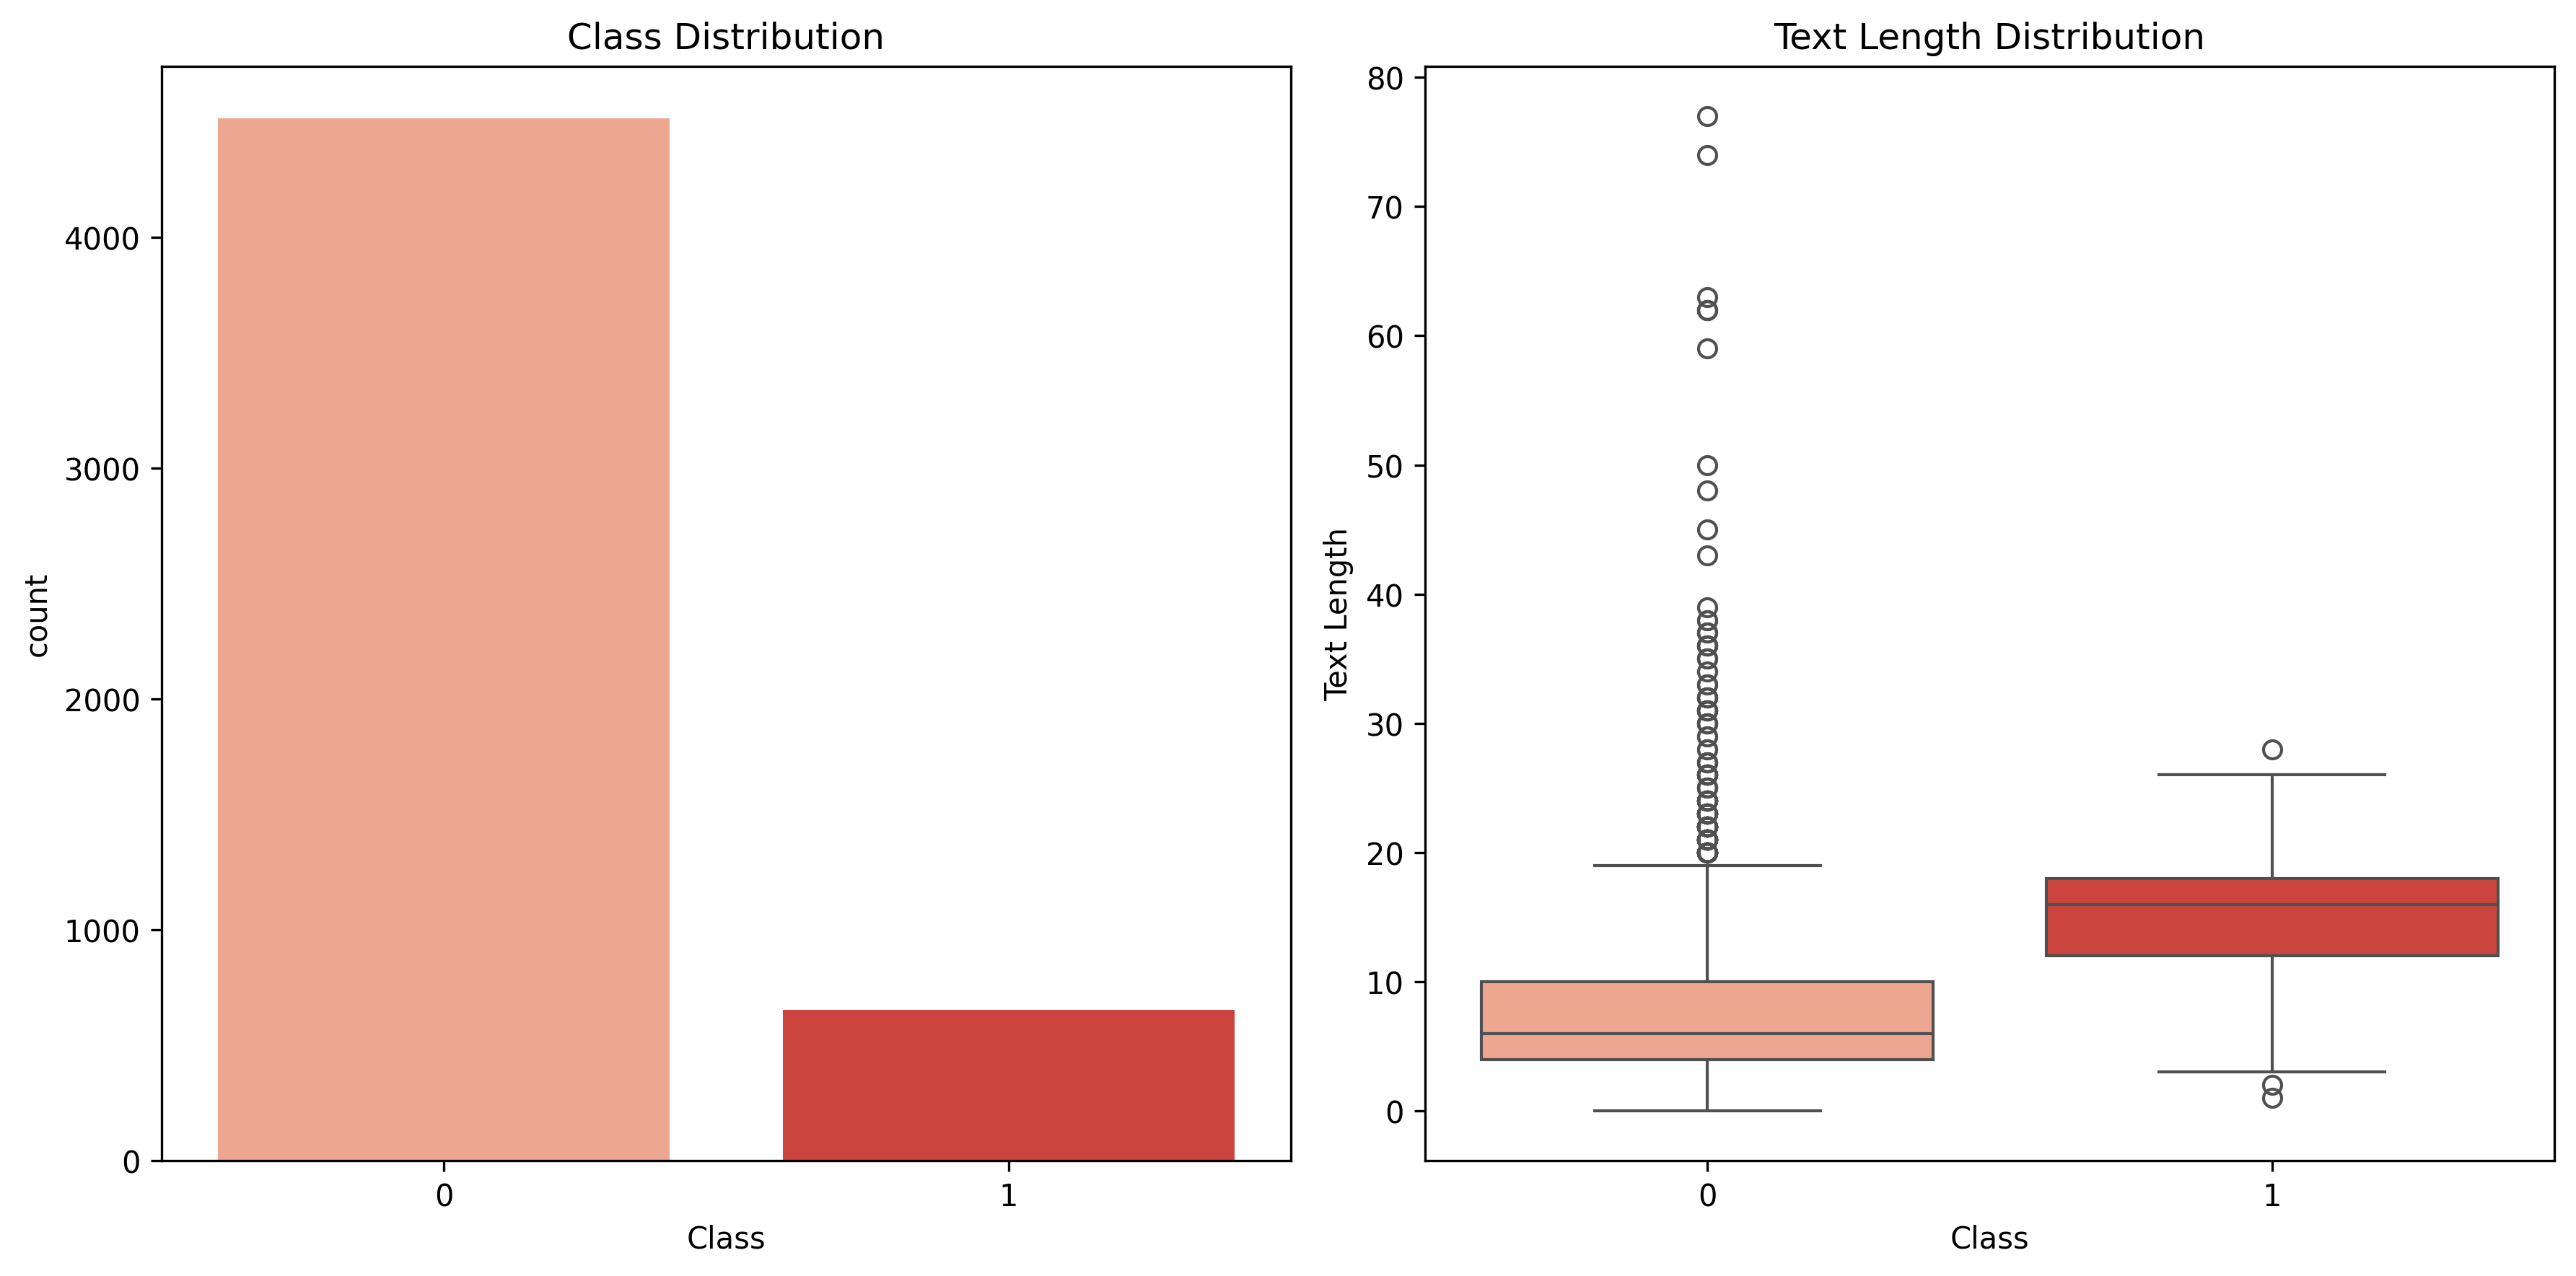

In [43]:
plt.figure(figsize=(12, 6), dpi=300)
plt.subplot(1, 2, 1)
sns.countplot(x='label', data=df, palette='Reds')
plt.title('Class Distribution')
plt.xlabel('Class')

plt.subplot(1, 2, 2)
df['text_length'] = df['text'].apply(lambda x: len(x.split())) 
sns.boxplot(x='label', y='text_length', data=df, palette='Reds')
plt.title('Text Length Distribution')
plt.xlabel('Class')
plt.ylabel('Text Length')
plt.tight_layout()
plt.show()

#### <span style="color: #D21312">Text Length Distribution with KDE</span>

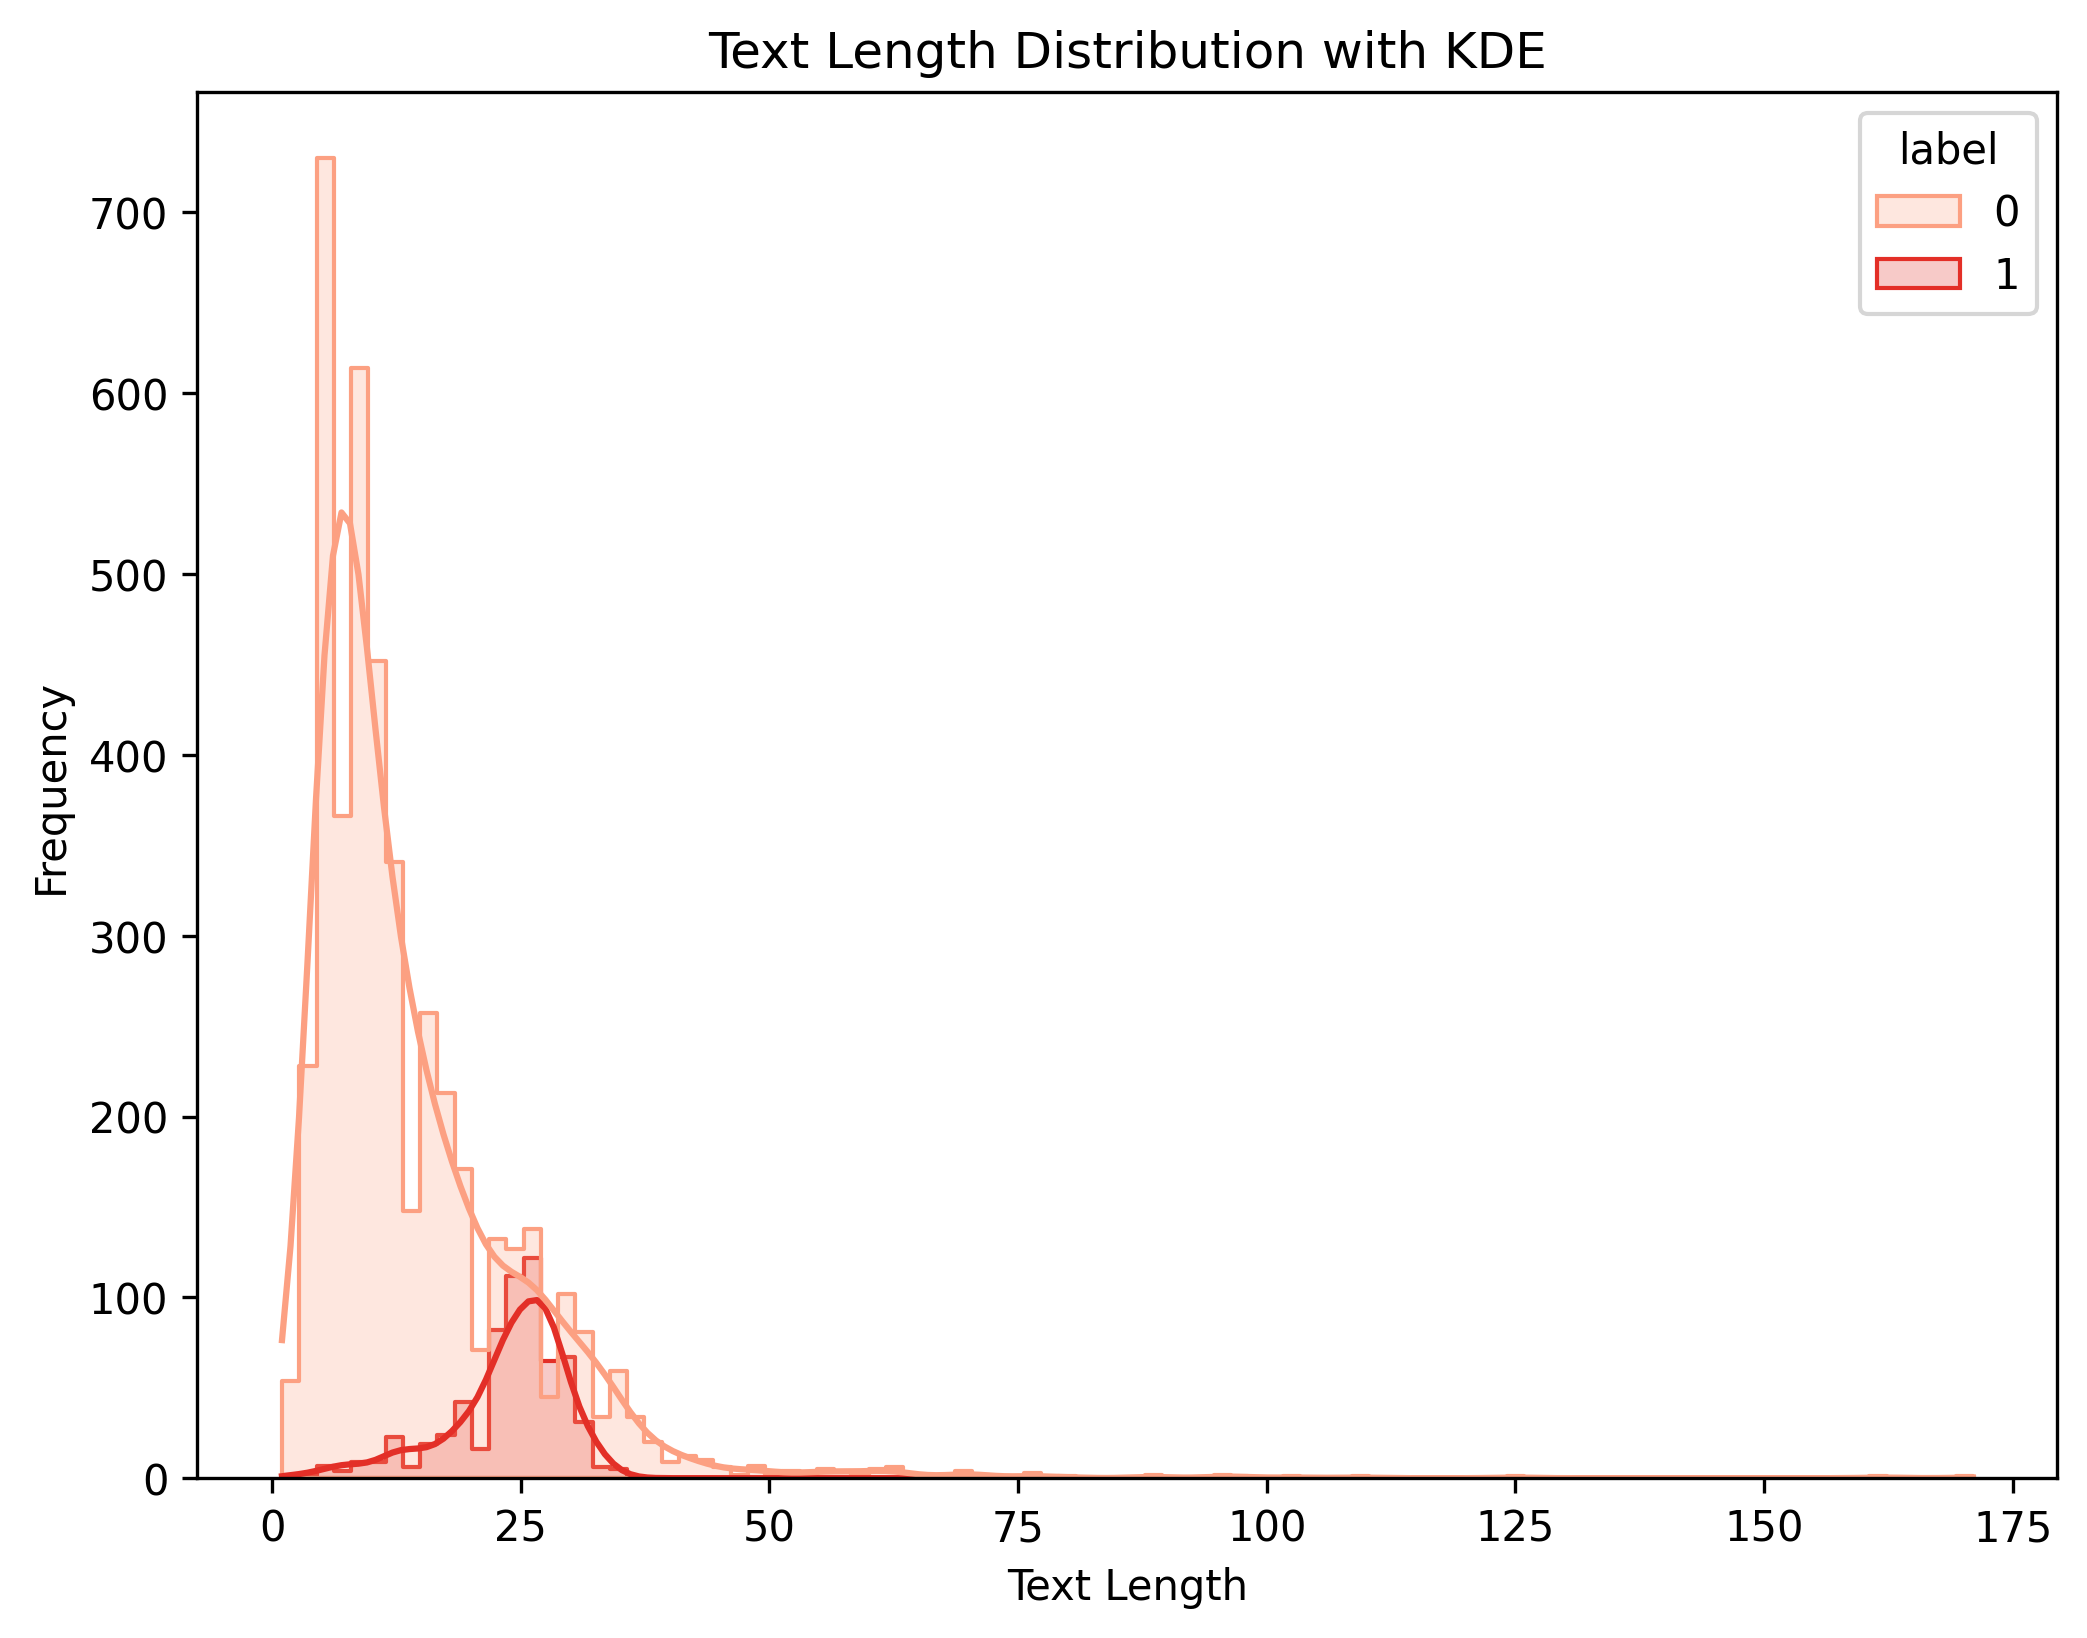

In [29]:
plt.figure(figsize=(8, 6), dpi=300)
sns.histplot(data=df, x='text_length', hue='label', kde=True, element='step', palette='Reds')
plt.title('Text Length Distribution with KDE')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

##### <span style="color: #070A52">The plot provides a visual representation of the distribution of text message lengths for both "ham" (non-spam) and "spam" messages. By analyzing this plot, we can observe that the majority of "ham" SMS messages have a text length below 10. This insight suggests that most legitimate messages tend to be relatively short, which aligns with typical communication patterns in concise and informal text messages.</span>

#### <span style="color: #D21312">Word Cloud for two labels</span>

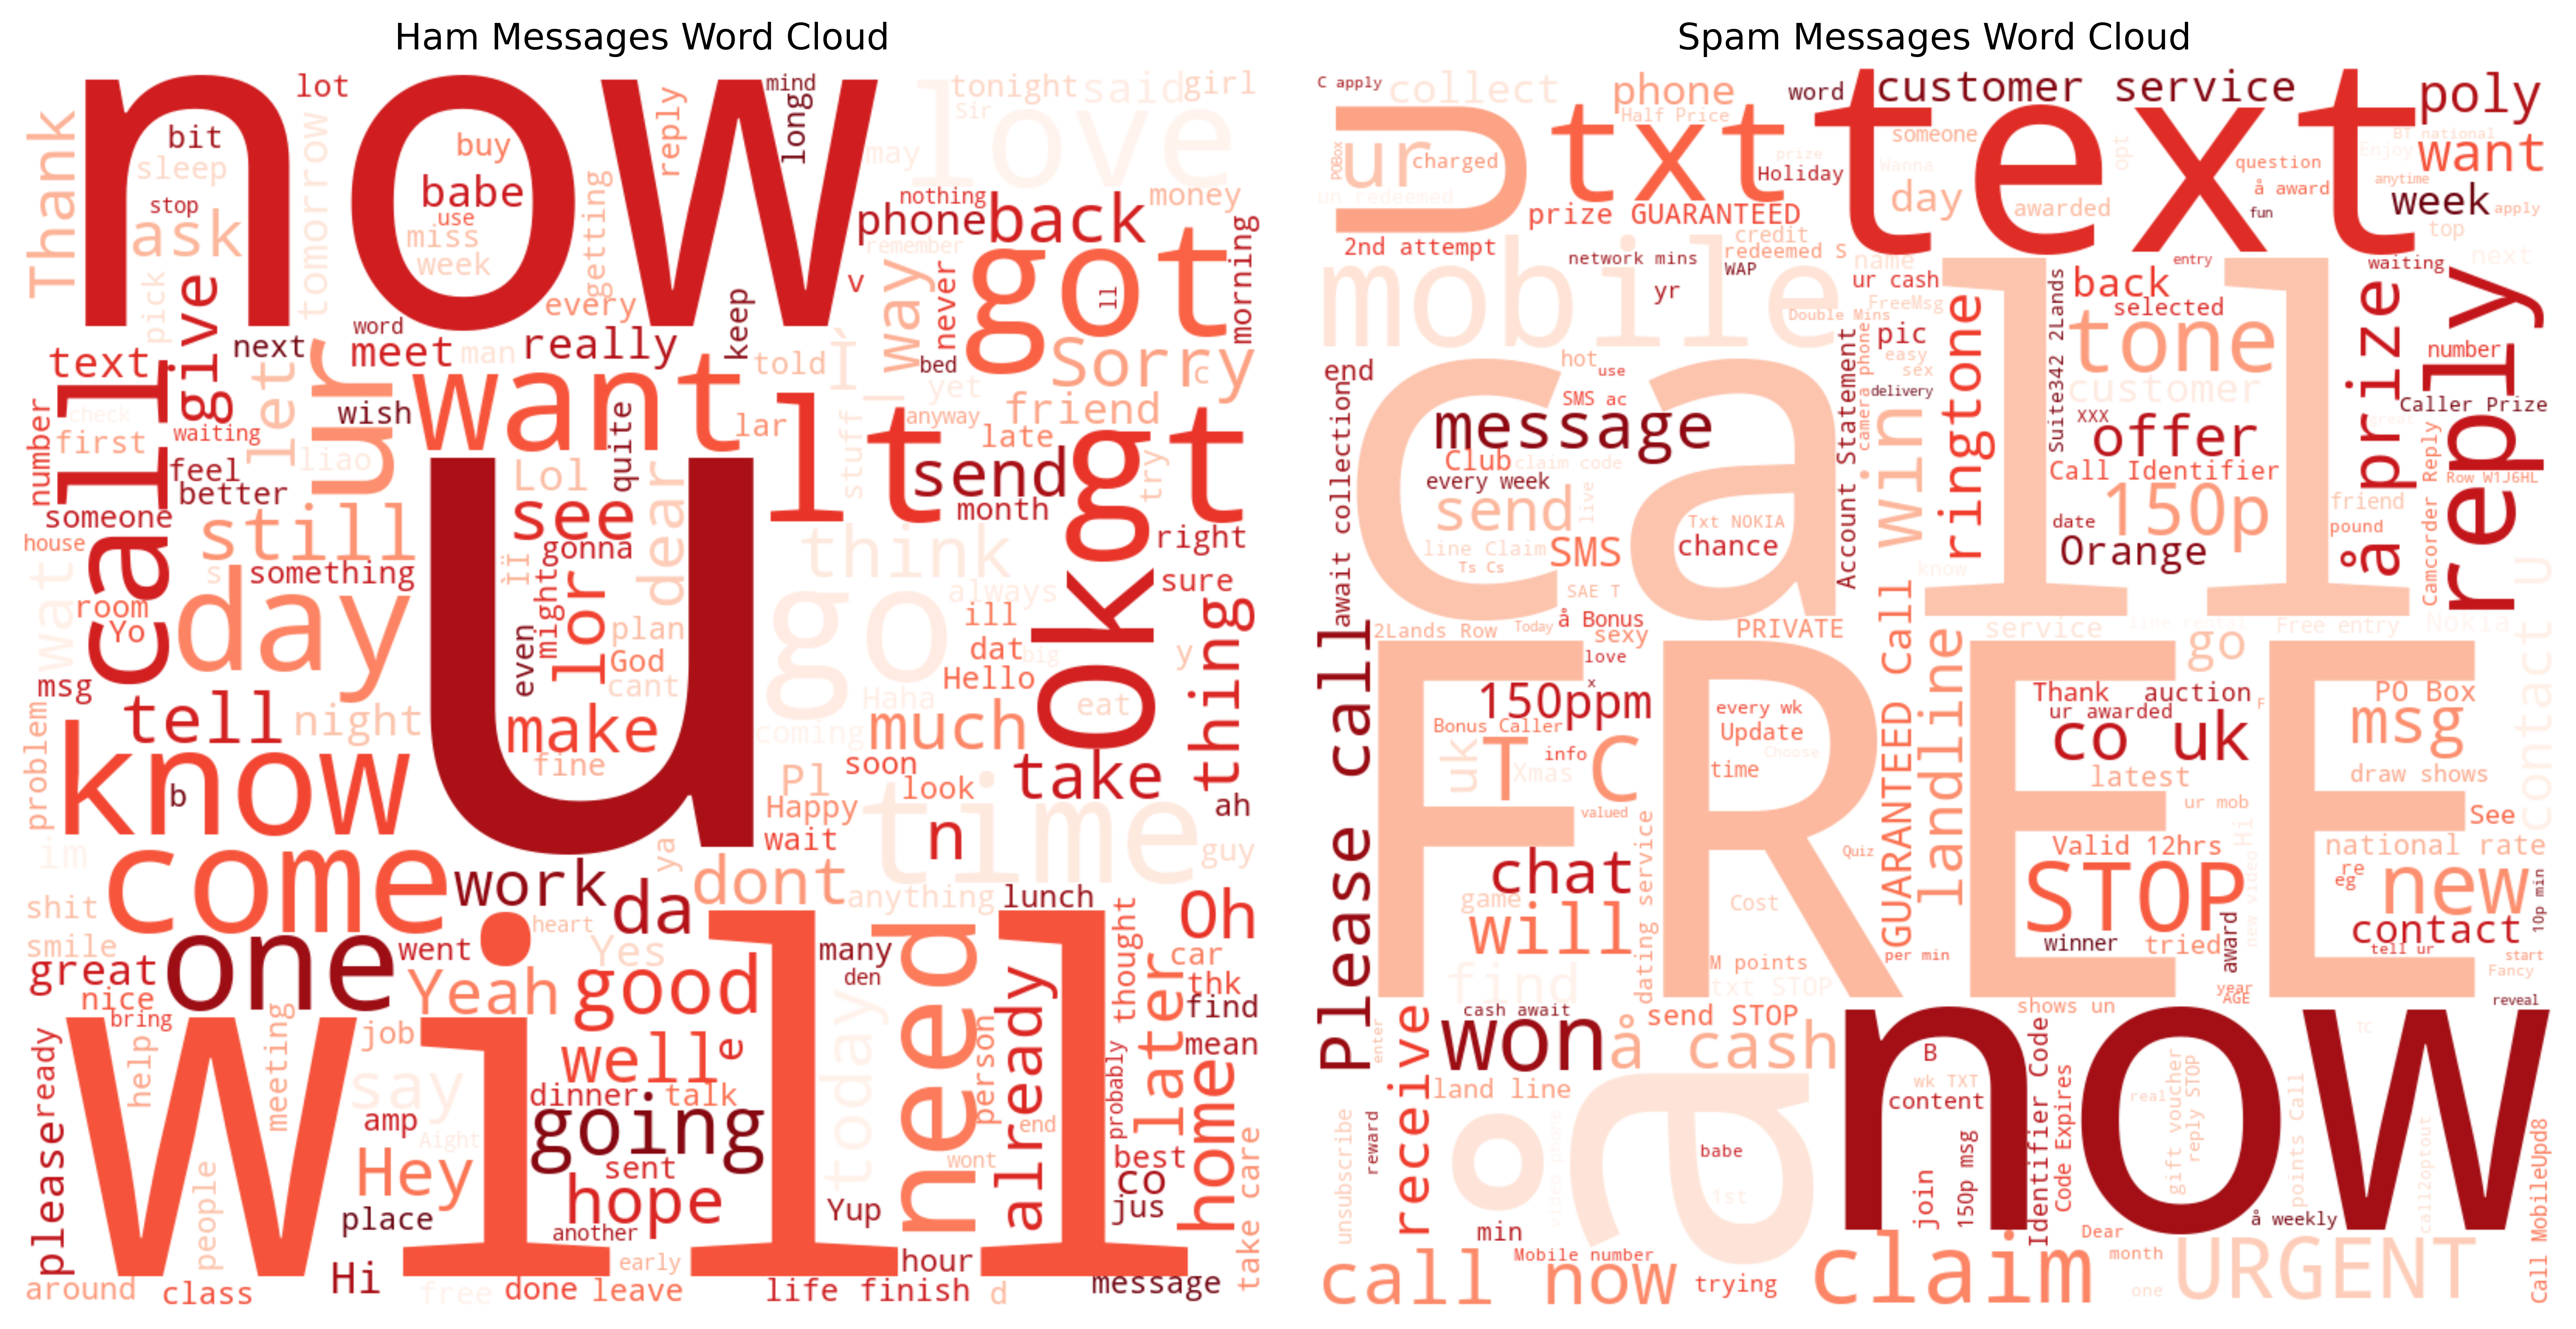

In [30]:
ham_text = " ".join(df[df['label'] == 0]['text'])
spam_text = " ".join(df[df['label'] == 1]['text'])

ham_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(ham_text)
spam_wordcloud = WordCloud(width=800, height=800, background_color='white', colormap='Reds').generate(spam_text)

ham_image = ham_wordcloud.to_array()
spam_image = spam_wordcloud.to_array()

plt.figure(figsize=(12, 6), dpi=600)

plt.subplot(1, 2, 1)
plt.imshow(ham_image, interpolation='bilinear')
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(spam_image, interpolation='bilinear')
plt.title('Spam Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

<h2 style="position: relative;">
    <span style="color: #070A52;">Text Preprocessing and Modeling</span> 
    <br/>
    <br/>
    <br/>
    <hr style="position: absolute; bottom: -8px; border: none; height: 4px; width: 100%; background-color: #FB9AD1;">
</h2>

<h3 style="color: #070A52">Text Preprocessing</h3>
<p>Text preprocessing is an essential step in natural language processing that involves cleaning and transforming raw text data into a format suitable for analysis. In the provided code snippet, we perform the following preprocessing steps on the text data:</p>

<ol>
        <li><strong style="color: #070A52">Tokenization:</strong> We tokenize the text into individual words, splitting it based on spaces and punctuation marks.</li>
        <li><strong style="color: #070A52">Lowercasing:</strong> All words are converted to lowercase to ensure consistent comparison and analysis.</li>
        <li><strong style="color: #070A52">Stopword Removal:</strong> We eliminate common words (stopwords) that do not contribute significantly to the meaning of the text.</li>
</ol>

<p>The processed words are then joined back together to form preprocessed text. This preprocessing is performed using the <code>word_tokenize</code> function from the Natural Language Toolkit (NLTK) library and the stopwords list provided by NLTK.</p>

<p style="color: #070A52">By applying these preprocessing techniques, we create a cleaner and more manageable text dataset for further analysis and modeling. This process enhances the quality of text-based tasks such as classification, sentiment analysis, and topic modeling.</p>


In [31]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /Users/macos/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/macos/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [32]:
def preprocess_text(text):
    words = word_tokenize(text) #Tokenization
    words = [word.lower() for word in words if word.isalnum()] #to Lowercase
    words = [word for word in words if word not in stopwords.words("english")] #Remove Stopwords
    return " ".join(words) #Concate tokens

In [33]:
df['text'] = df['text'].apply(preprocess_text)

In [34]:
df['text'][0]

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

<h3 style="color: #070A52">TF-IDF Vectorization and Logistic regression Classification</h3>
<p>In this code snippet, we demonstrate the process of TF-IDF (Term Frequency-Inverse Document Frequency) vectorization followed by classification using the Multinomial Naive Bayes algorithm:</p>

<ol>
        <li><strong style="color: #070A52">TF-IDF Vectorization:</strong> We use the <code>TfidfVectorizer</code> from the scikit-learn library to convert the text data into a numerical format suitable for machine learning. The <code>max_features</code> parameter limits the number of unique words, and the <code>ngram_range</code> parameter specifies the range of n-grams (word combinations).</li>
        <li><strong style="color: #070A52">Train-Test Split:</strong> The dataset is split into training and testing sets using the <code>train_test_split</code> function. This division allows us to evaluate the model's performance on unseen data.</li>
        <li><strong style="color: #070A52">Logistic regression :</strong> We create an instance of the <code>Logistic Regression</code> classifier and train it on the training data. The algorithm uses <code>liblinear</code> as the optimization algorithm.

<p style="color: #070A52">By combining TF-IDF vectorization with the Logistic Regression algorithm, we build a text classification model capable of distinguishing between different classes based on their textual content.</p>


In [35]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['text']).toarray()
y = df['label']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(solver='liblinear')  
logistic_model.fit(X_train, y_train)


LogisticRegression(solver='liblinear')

#### <span style="color: #070A52">Classification Report</span>

In [38]:
y_pred = logistic_model.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.97
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       889
           1       0.96      0.81      0.88       145

    accuracy                           0.97      1034
   macro avg       0.96      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034



#### <span style="color: #070A52">Confusion Matrix</span>

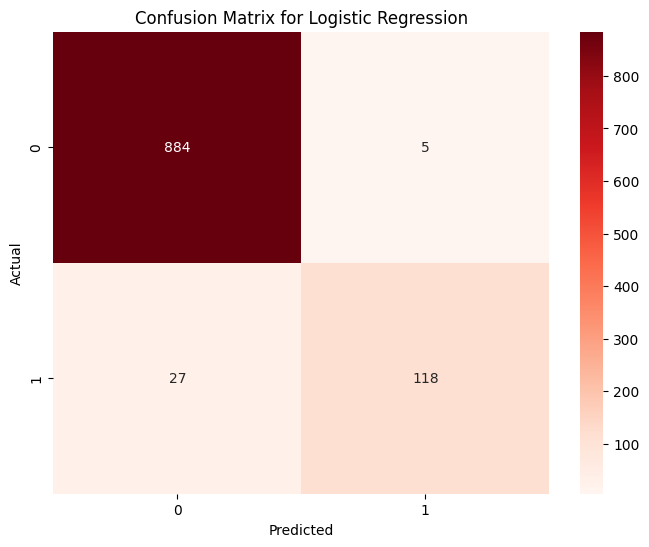

In [39]:
cm_logistic = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logistic, annot=True, fmt="d", cmap="Reds", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()


<div style="width: 100%; background-color:#FFCDEA; color: white; padding: 20px; border: 3px solid #FB9AD1; margin-bottom: 20px;border-radius:10px;color: #000000;">
    <h3 style="color: #070A52;">Summary: Project Achievement</h3><br>
    <span>Through dedicated efforts and effective implementation, we have successfully developed a simple SMS Spam Classification model. By leveraging powerful text preprocessing techniques, feature extraction, and machine learning algorithms, we have achieved exceptional results in accurately distinguishing between "ham" (non-spam) and "spam" messages.</span>
    <br>
    <br>
    <span>Our Simple SMS Spam Classification model has demonstrated an accuracy rate of <strong>97%</strong>. This high accuracy signifies the model's ability to correctly classify incoming messages.</span>
    <br>
    <br>
    <span>The simple project's success showcases the efficacy of combining sophisticated natural language processing techniques with intelligent machine learning algorithms. Our achievement of 97% accuracy underlines the importance of accurate spam detection and highlights the potential for practical applications in enhancing user experience and security in the realm of mobile communications.</span>
</div>

<div style="width: 100%; height: 100px; background-color:#FFCDEA; border: 3px solid #FB9AD1; text-align: center; line-height: 100px; color: #070A52; font-size: 24px; font-weight: bold; border-radius:6px;">
    Thanks for paying attention to this notebook ❤️
</div>